# Inset-maps : get a zoomed-in view on selected areas

Quickly create nice inset-maps to show details for specific regions.

- the location and extent of the inset can be defined in any given crs

  - (or as a geodesic circle with a radius defined in meters)

- the inset-map can have a different crs than the "parent" map

(requires EOmaps >= v4.1)

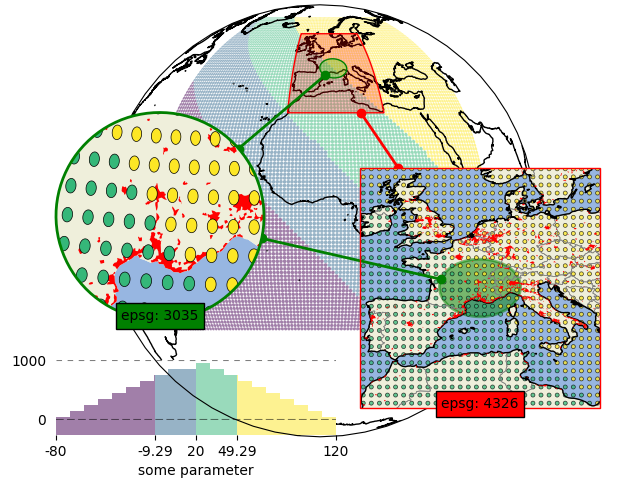

In [1]:
# EOmaps example: How to create inset-maps

from eomaps import Maps
import numpy as np

m = Maps(Maps.CRS.Orthographic())
m.add_feature.preset.coastline()  # add some coastlines

# ---------- create a new inset-map
#            showing a 15 degree rectangle around the xy-point
mi1 = m.new_inset_map(
    xy=(5, 45),
    xy_crs=4326,
    shape="rectangles",
    radius=15,
    plot_position=(0.75, 0.4),
    plot_size=0.5,
    inset_crs=4326,
    boundary=dict(ec="r", lw=1),
    indicate_extent=dict(fc=(1, 0, 0, 0.25)),
)

mi1.add_indicator_line(m, marker="o")

# populate the inset with some more detailed features
mi1.add_feature.preset("coastline", "ocean", "land", "countries", "urban_areas")

# ---------- create another inset-map
#            showing a 400km circle around the xy-point
mi2 = m.new_inset_map(
    xy=(5, 45),
    xy_crs=4326,
    shape="geod_circles",
    radius=400000,
    plot_position=(0.25, 0.4),
    plot_size=0.5,
    inset_crs=3035,
    boundary=dict(ec="g", lw=2),
    indicate_extent=dict(fc=(0, 1, 0, 0.25)),
)
mi2.add_indicator_line(m, marker="o")

# populate the inset with some features
mi2.add_feature.preset("ocean", "land")
mi2.add_feature.preset.urban_areas(zorder=1)

# print some data on all of the maps

x, y = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-30, 70, 100))
data = x + y

m.set_data(data, x, y, crs=4326)
m.set_classify.Quantiles(k=4)
m.plot_map(alpha=0.5, ec="none", set_extent=False)

# use the same data and classification for the inset-maps
for m_i in [mi1, mi2]:
    m_i.inherit_data(m)
    m_i.inherit_classification(m)

mi1.set_shape.ellipses(np.mean(m.shape.radius) / 2)
mi1.plot_map(alpha=0.75, ec="k", lw=0.5, set_extent=False)

mi2.set_shape.ellipses(np.mean(m.shape.radius) / 2)
mi2.plot_map(alpha=1, ec="k", lw=0.5, set_extent=False)


# add an annotation for the second datapoint to the inset-map
mi2.add_annotation(ID=1, xytext=(-120, 80))

# indicate the extent of the second inset on the first inset
mi2.add_extent_indicator(mi1, ec="g", lw=2, fc="g", alpha=0.5, zorder=0)
mi2.add_indicator_line(mi1, marker="o")

# add some additional text to the inset-maps
for m_i, txt, color in zip([mi1, mi2], ["epsg: 4326", "epsg: 3035"], ["r", "g"]):
    txt = m_i.ax.text(
        0.5,
        0,
        txt,
        transform=m_i.ax.transAxes,
        horizontalalignment="center",
        bbox=dict(facecolor=color),
    )
    # add the text-objects as artists to the blit-manager
    m_i.BM.add_artist(txt)

mi2.add_colorbar(hist_bins=20, margin=dict(bottom=-0.2), label="some parameter")
# move the inset map (and the colorbar) to a different location
mi2.set_inset_position(x=0.3)

# share pick events
for mi in [m, mi1, mi2]:
    mi.cb.pick.attach.annotate(text=lambda ID, val, **kwargs: f"ID={ID}\nval={val:.2f}")
m.cb.pick.share_events(mi1, mi2)

m.apply_layout(
    {
        "figsize": [6.4, 4.8],
        "0_map": [0.1625, 0.09, 0.675, 0.9],
        "1_inset_map": [0.5625, 0.15, 0.375, 0.5],
        "2_inset_map": [0.0875, 0.33338, 0.325, 0.43225],
        "3_cb": [0.0875, 0.12, 0.4375, 0.12987],
        "3_cb_histogram_size": 0.8,
    }
)
m.show()